In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('complete_data.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,title,year,country_1,country_2,country_3,language,duration,genre_1,genre_2,genre_3,...,votes_18-30yrs,avg_rating_30-45yrs,votes_30-45yrs,avg_rating_>45yrs,votes_>45yrs,positive_votes,neutral_votes,negative_votes,percentage_of_positive_reviews,overall_eval
0,Psycho,1960,USA,NaN,NaN,English,109,Horror,Mystery,Thriller,...,130264.0,8.4,200243.0,8.5,70585.0,509541,37238,8448,0.92,1
1,Spartacus,1960,USA,NaN,NaN,English,197,Adventure,Biography,Drama,...,16670.0,7.8,49635.0,8.0,23509.0,101184,12075,2545,0.87,1
2,Swiss Family Robinson,1960,USA,NaN,NaN,English,126,Adventure,Family,NaN,...,1555.0,7.2,4841.0,7.1,3165.0,9370,2922,305,0.74,1
3,One Hundred and One Dalmatians,1961,USA,NaN,NaN,English,79,Animation,Adventure,Comedy,...,45975.0,7.1,49250.0,7.3,11390.0,108703,31021,1998,0.77,1
4,Une femme est une femme,1961,France,Italy,NaN,French,85,Comedy,Drama,Romance,...,3760.0,7.5,5383.0,6.9,1789.0,10898,2362,424,0.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,Captive State,2019,USA,NaN,NaN,English,109,Drama,Sci-Fi,Thriller,...,10564.0,6.0,15809.0,6.0,3195.0,27819,10008,2489,0.69,1
4144,The Angry Birds Movie 2,2019,Finland,USA,NaN,English,97,Animation,Adventure,Comedy,...,1945.0,6.3,2891.0,6.2,624.0,4878,3349,569,0.55,0
4145,The Lion King,2019,USA,NaN,NaN,English,118,Animation,Adventure,Drama,...,38746.0,6.9,37888.0,7.0,6767.0,94591,31838,8847,0.70,1
4146,The Kitchen,2019,USA,NaN,NaN,English,102,Action,Crime,Drama,...,1013.0,5.2,1813.0,5.6,1014.0,1812,2669,1311,0.31,0


# Model 1

In [7]:
df[['actor_1','listing_1','actor_2', 'listing_2','actor_3', 'listing_3']].tail(20)

,actor_1,listing_1,actor_2,listing_2,actor_3,listing_3
4128,Haley Lu Richardson,D,Cole Sprouse,D,Moises Arias,D
4129,Zachary Levi,C,Mark Strong,C,Asher Angel,D
4130,Keanu Reeves,A,Halle Berry,B,Ian McShane,B
4131,Emma Thompson,A,Mindy Kaling,B,John Lithgow,D
4132,Jay Baruchel,B,America Ferrera,D,F. Murray Abraham,D
4133,Constance Wu,D,Jennifer Lopez,B,Julia Stiles,D
4134,Ewan McGregor,A,Rebecca Ferguson,B,Kyliegh Curran,D
4135,Nicholas Hoult,D,Al Bollands,D,Kallum Tolkien,D
4136,Rosa Salazar,D,Christoph Waltz,B,Jennifer Connelly,C
4137,Rebel Wilson,B,Liam Hemsworth,D,Adam Devine,D


In [147]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
labelencoder = LabelEncoder()
X = df[['budget_USD', 'genre_1', 'country_1','listing_1', 'listing_2', 'listing_3']].apply(LabelEncoder().fit_transform)
y = df['avg_user_rating']
# y = df['IMDB_rating'].values.reshape(1,-1)
print(X.shape, y.shape)

(4148, 6) (4148,)


In [148]:
# Train, Test, Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [149]:
# Scaling x values
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [150]:
# Training regression model
regressor1 = LinearRegression(fit_intercept = False)  
regressor1.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [151]:
coeff_df1 = pd.DataFrame(regressor1.coef_, X.columns, columns=['Coefficient'])  
coeff_df1

,Coefficient
budget_USD,3.597668
genre_1,2.645793
country_1,2.146925
listing_1,0.528293
listing_2,0.736417
listing_3,1.262948


In [152]:
# Calculated y predicted 
y_pred1 = regressor1.predict(X_test_scaled)

In [153]:
# Predicted and Actual y Values
predict_actual_df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})
predict_actual_df1.head()

,Actual,Predicted
2572,6.7,6.396740
2527,6.4,7.224683
1497,5.7,4.819372
2740,6.8,6.754529
3776,6.3,5.602436


In [154]:
# Predicted, Actual, Error
predict_actual_error1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1,  "Error": y_pred1 - y_test})[["Predicted", "Actual", "Error"]]
predict_actual_error1.head(10)

,Predicted,Actual,Error
2572,6.396740,6.7,-0.303260
2527,7.224683,6.4,0.824683
1497,4.819372,5.7,-0.880628
2740,6.754529,6.8,-0.045471
3776,5.602436,6.3,-0.697564
2623,8.389694,4.0,4.389694
3911,6.908122,6.2,0.708122
2621,5.934185,6.3,-0.365815
3312,4.855782,7.0,-2.144218
2418,7.043474,5.8,1.243474


In [155]:
regressor1.score(X_test_scaled, y_test)

-1.200965631922354

In [156]:
from sklearn.metrics import mean_squared_error, r2_score
# predicted = regressor1.predict(X_test_scaled)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 2.2707746371065967
R-squared (R2 ): -1.200965631922354


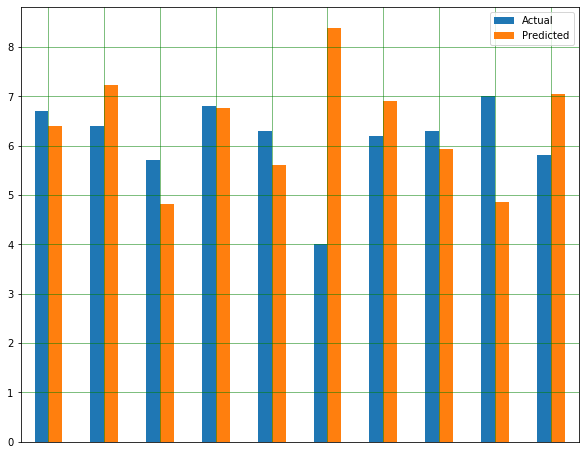

In [157]:
# Predicted VS. Actual Bar Chart
predicted_actual_sample = predict_actual_df1.head(10)
predicted_actual_sample.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.savefig('imdb_rating_predactplot_npt.png')
plt.show()

In [158]:
X.describe()

,budget_USD,genre_1,country_1,listing_1,listing_2,listing_3
count,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000,4148.000000
mean,304.960222,3.395853,41.158631,1.556172,2.198891,2.502411
std,111.779536,2.749400,11.711297,1.371267,1.177200,1.005528
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,236.000000,0.000000,45.000000,0.000000,1.000000,3.000000
50%,329.000000,4.000000,46.000000,2.000000,3.000000,3.000000
75%,380.000000,5.000000,46.000000,3.000000,3.000000,3.000000
max,511.000000,16.000000,48.000000,3.000000,3.000000,3.000000


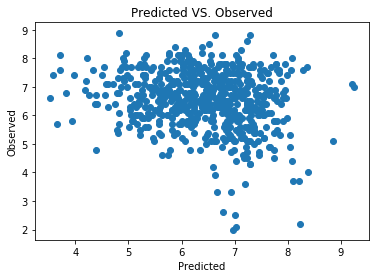

In [161]:
# Scatter plot
plt.scatter(y_pred1, y_test)
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.title("Predicted VS. Observed")
plt.savefig('imdb_rating_obvVSpred_npt.png')

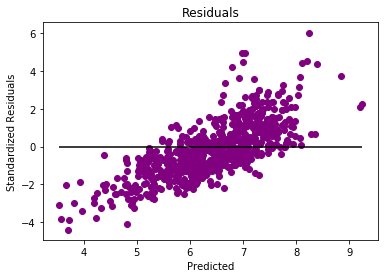

In [163]:
# Residuals
plt.scatter(y_pred1, y_pred1-y_test, c='purple')
plt.hlines(y=0, xmin=y_pred1.min(), xmax=y_pred1.max())
plt.ylabel('Standardized Residuals')
plt.xlabel('Predicted')
plt.title("Residuals")
plt.savefig('imdb_rating_resid_npt.png')
plt.show()

# Model 2

In [164]:
X = df[['budget_USD', 'genre_1', 'country_1','listing_1', 'listing_2', 'listing_3']].apply(LabelEncoder().fit_transform)
y = df['metascore']
# y = df['IMDB_rating'].values.reshape(1,-1)
print(X.shape, y.shape)

(4148, 6) (4148,)


In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [166]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [167]:
regressor2 = LinearRegression()  
regressor2.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [168]:
coeff_df2 = pd.DataFrame(regressor2.coef_, X.columns, columns=['Coefficient'])  
coeff_df2

,Coefficient
budget_USD,-20.525653
genre_1,0.015408
country_1,-5.327960
listing_1,-2.702053
listing_2,-4.229431
listing_3,-4.400357


In [169]:
y_pred2 = regressor2.predict(X_test_scaled)

In [170]:
predict_actual_df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2})
predict_actual_df2

,Actual,Predicted
2572,55.0,57.866804
2527,63.0,53.115195
1497,64.0,57.634354
2740,65.0,52.341278
3776,77.0,63.352278
...,...,...
2597,74.0,56.009561
4062,46.0,53.786258
110,58.0,58.453636
2494,37.0,58.367050


In [171]:
predict_actual_error2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred2,  "Error": y_pred2 - y_test})[["Predicted", "Actual", "Error"]]
predict_actual_error2.head(10)

,Predicted,Actual,Error
2572,57.866804,55.0,2.866804
2527,53.115195,63.0,-9.884805
1497,57.634354,64.0,-6.365646
2740,52.341278,65.0,-12.658722
3776,63.352278,77.0,-13.647722
2623,51.502482,22.0,29.502482
3911,55.233255,47.0,8.233255
2621,54.207132,46.0,8.207132
3312,62.908880,81.0,-18.091120
2418,53.296548,49.0,4.296548


In [172]:
regressor2.score(X_test_scaled, y_test)

0.031201660933121933

In [173]:
# Score the predictions with mse and r2
mse = mean_squared_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 297.7427665164491
R-squared (R2 ): 0.031201660933121933


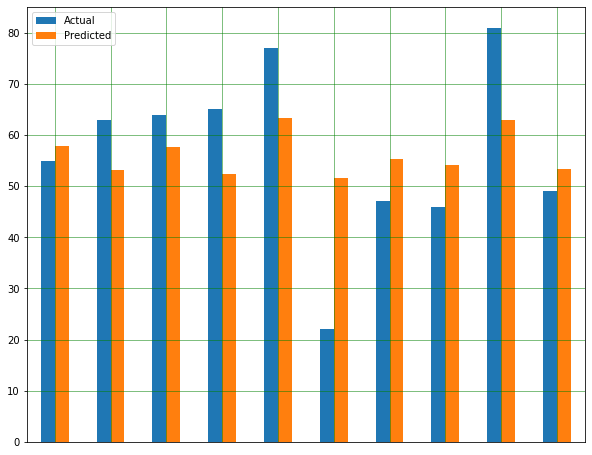

In [174]:
predicted_actual_sample2 = predict_actual_df2.head(10)
predicted_actual_sample2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.savefig('metascore_predactplot_npt.png')
plt.show()

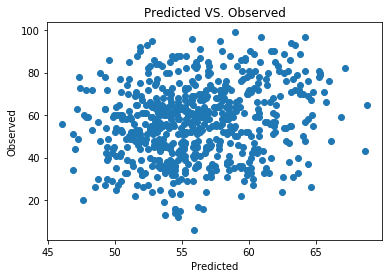

In [176]:
plt.scatter(y_pred2,y_test)
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.title("Predicted VS. Observed")
plt.savefig('metascore_obvVSpred_npt.png')

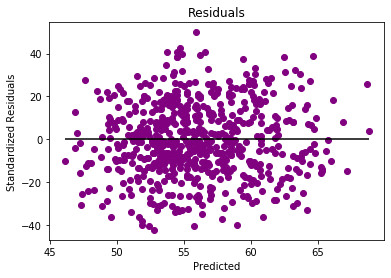

In [177]:
# Residuals
plt.scatter(y_pred2, y_pred2-y_test, c='purple')
plt.hlines(y=0, xmin=y_pred2.min(), xmax=y_pred2.max())
plt.ylabel('Standardized Residuals')
plt.xlabel('Predicted')
plt.title("Residuals")
plt.savefig('metascore_resid_npt.png')
plt.show()

# Model 3

In [178]:
X = df[['budget_USD', 'genre_1', 'country_1','listing_1', 'listing_2', 'listing_3']].apply(LabelEncoder().fit_transform)
y = df['worlwide_gross_income']
# y = df['IMDB_rating'].values.reshape(1,-1)
print(X.shape, y.shape)

(4148, 6) (4148,)


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [180]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [181]:
#  Training model
regressor = LinearRegression()  
regressor.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
# Getting regression coefficients
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
budget_USD,3.718719e+08
genre_1,-8.012916e+07
country_1,1.519807e+07
listing_1,-1.033763e+07
listing_2,-3.959984e+07
listing_3,-8.690927e+07


In [183]:
# Predicting y
y_pred = regressor.predict(X_test_scaled)

In [184]:
# Predicted vs. Actual
predict_actual_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predict_actual_df

,Actual,Predicted
2572,102820008.0,1.736487e+08
2527,64616723.0,1.435094e+08
1497,68514844.0,2.727042e+08
2740,63782078.0,1.569435e+08
3776,27397655.0,1.198290e+08
...,...,...
2597,154026136.0,1.971686e+08
4062,50444358.0,7.705026e+07
110,46236000.0,6.675316e+07
2494,278346189.0,3.511805e+08


In [185]:
predict_actual_error3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,  "Error": y_pred - y_test})[["Predicted", "Actual", "Error"]]
predict_actual_error3.head(10)

,Predicted,Actual,Error
2572,1.736487e+08,102820008.0,7.082874e+07
2527,1.435094e+08,64616723.0,7.889272e+07
1497,2.727042e+08,68514844.0,2.041893e+08
2740,1.569435e+08,63782078.0,9.316144e+07
3776,1.198290e+08,27397655.0,9.243134e+07
2623,8.848265e+07,40136479.0,4.834617e+07
3911,4.584378e+07,6819044.0,3.902473e+07
2621,2.510294e+08,160078586.0,9.095080e+07
3312,2.539224e+08,19206513.0,2.347158e+08
2418,2.590414e+08,53998806.0,2.050426e+08


In [186]:
from sklearn.metrics import mean_squared_error, r2_score
# predicted = regressor.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 3.955008087291038e+16
R-squared (R2 ): 0.2928037592771814


In [187]:
regressor.score(X_test_scaled, y_test)

0.2928037592771814

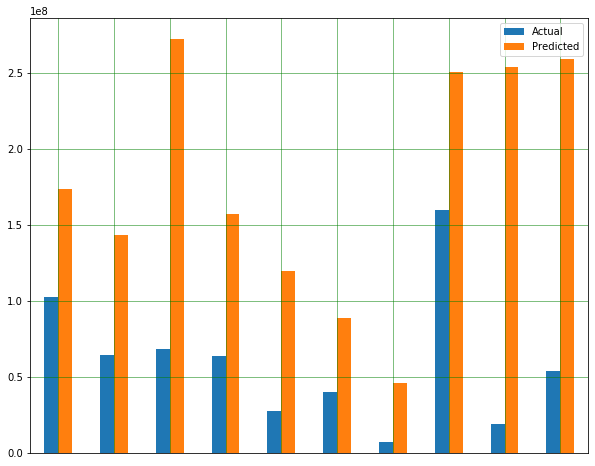

In [188]:
predicted_actual_sample = predict_actual_df.head(10)
predicted_actual_sample.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.tick_params(axis='x',bottom=False,labelbottom=False)
plt.savefig('wgi_predactplot_npt.png')
plt.show()

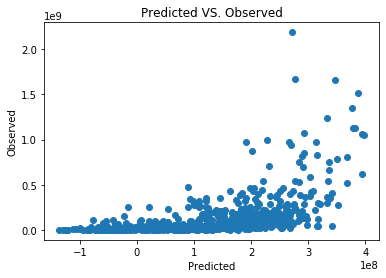

In [192]:
plt.scatter(y_pred,y_test)
plt.ylabel('Observed')
plt.xlabel('Predicted')
plt.title("Predicted VS. Observed")
plt.savefig('wgi_obvVSpred_npt.png')

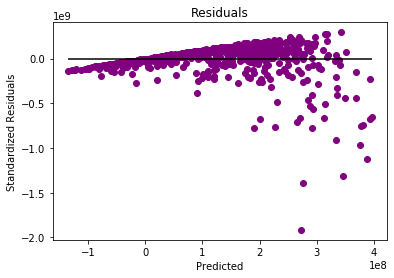

In [193]:
# Residuals
plt.scatter(y_pred, y_pred-y_test, c='purple')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.ylabel('Standardized Residuals')
plt.xlabel('Predicted')
plt.title("Residuals")
plt.savefig('wgi_resid_npt.png')
plt.show()

# Model 4

In [87]:
X = df[['budget_USD', 'genre_1', 'country_1','listing_1', 'listing_2', 'listing_3']].apply(LabelEncoder().fit_transform)
y = df['metascore']
# y = df['IMDB_rating'].values.reshape(1,-1)
print(X.shape, y.shape)

(4148, 6) (4148,)


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [89]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [90]:
regressor4 = LinearRegression()  
regressor4.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
coeff_df = pd.DataFrame(regressor4.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
budget_USD,-20.525653
genre_1,0.015408
country_1,-5.327960
listing_1,-2.702053
listing_2,-4.229431
listing_3,-4.400357


In [92]:
y_pred4 = regressor4.predict(X_test_scaled)

In [93]:
predict_actual_df4 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred4})
predict_actual_df4

,Actual,Predicted
2572,55.0,57.866804
2527,63.0,53.115195
1497,64.0,57.634354
2740,65.0,52.341278
3776,77.0,63.352278
...,...,...
2597,74.0,56.009561
4062,46.0,53.786258
110,58.0,58.453636
2494,37.0,58.367050


In [94]:
regressor4.score(X_test_scaled, y_test)

0.031201660933121933

In [95]:
mse = mean_squared_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 297.7427665164491
R-squared (R2 ): 0.031201660933121933


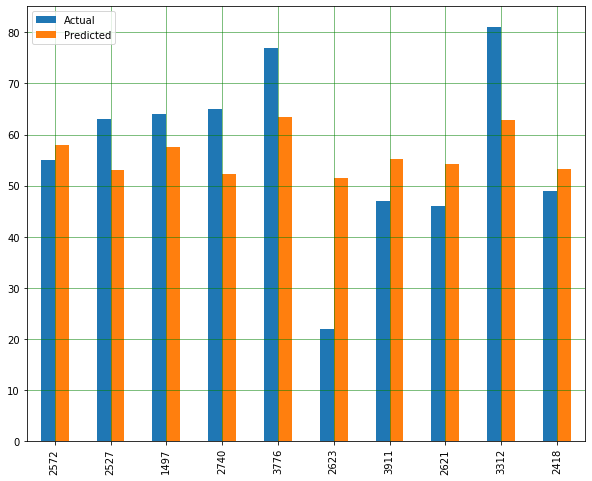

In [97]:
predicted_actual_sample = predict_actual_df4.head(10)
predicted_actual_sample.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()